In [2]:
#Referencing https://github.com/Hvass-Labs/FinanceOps/blob/master/01_Forecasting_Long-Term_Stock_Returns.ipynb

import requests
from bs4 import BeautifulSoup

import pandas as pd

import datetime

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import yfinance as yf
import pandas_datareader as pdr

In [3]:
df_sp500 = yf.Ticker("^GSPC").history(period='max')
df_sp500.index.name = None
df_sp500.index = pd.to_datetime(df_sp500.index).tz_localize(None)
df_sp500 = df_sp500.reindex(pd.date_range(df_sp500.index[0], df_sp500.index[-1], freq='D')).interpolate()

SP500_Sales_Per_Share = pd.read_csv('data/S&P 500 Sales Per Share.csv')
SP500_Sales_Per_Share.index = pd.to_datetime(SP500_Sales_Per_Share['Date\tSales Per Share'].str[:10], format='%m/%d/%Y')
SP500_Sales_Per_Share.index.name = None
SP500_Sales_Per_Share = SP500_Sales_Per_Share.rename(columns={'Date\tSales Per Share': 'Sales Per Share'})
SP500_Sales_Per_Share['Sales Per Share'] = SP500_Sales_Per_Share['Sales Per Share'].str[11:].astype('float')
SP500_Sales_Per_Share = SP500_Sales_Per_Share.sort_index()
SP500_Sales_Per_Share = SP500_Sales_Per_Share.reindex(pd.date_range(SP500_Sales_Per_Share.index[0], SP500_Sales_Per_Share.index[-1], freq='D')).interpolate()

df_sp500 = pd.merge(df_sp500['Close'].to_frame(), SP500_Sales_Per_Share, how='inner', left_index=True, right_index=True)
df_sp500 = df_sp500.rename(columns={'Close': 'Price'})
df_sp500['Price to Sales'] = df_sp500['Price'] / df_sp500['Sales Per Share']
df_sp500['Price to Sales Mean'] = df_sp500['Price to Sales'].expanding().mean()


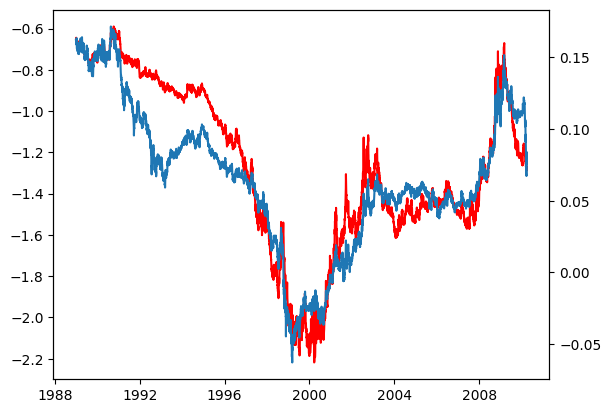

In [6]:
years = 10
Annualized_Return = ((df_sp500['Price'].shift(-365 * years) / df_sp500['Price']).dropna().pow(1 / years) - 1).to_frame()
plot_temp = pd.merge(df_sp500['Price to Sales'].to_frame(), Annualized_Return, how='inner', left_index=True, right_index=True)

fig, ax1 = plt.subplots()

ax1.plot(-plot_temp['Price to Sales'], 'r-')

ax2 = ax1.twinx()
ax2.plot(plot_temp['Price'] * 1)
plt.show()

[]

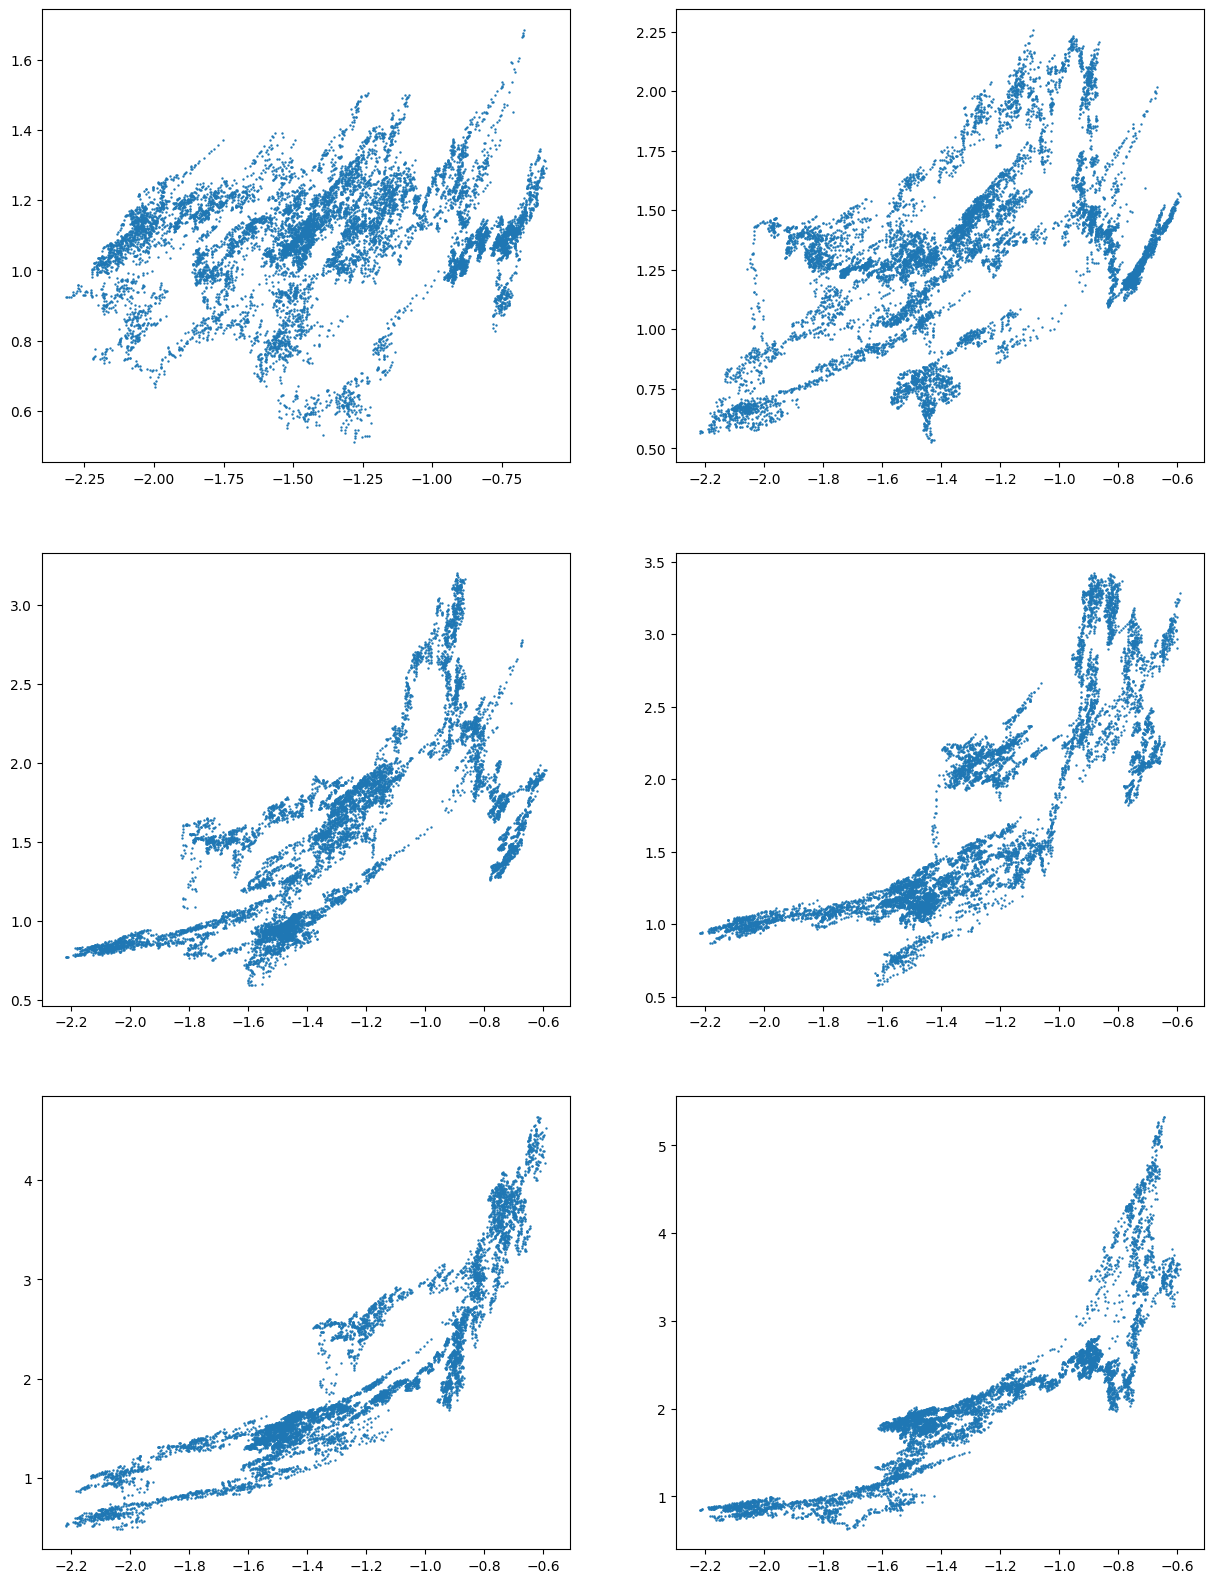

In [373]:
plt.figure(figsize = (15, 20))

i = 1
for years in range(1, 12, 2):
    plt.subplot(3, 2, i)
    i += 1
    
    Annualized_Return = ((df_sp500['Price'].shift(-365 * years) / df_sp500['Price']).dropna().pow(1 / years) - 1).to_frame()
    Return = (df_sp500['Price'].shift(-365 * years) / df_sp500['Price']).dropna().to_frame()
    #plot_temp = pd.merge(df_sp500['Price to Sales'].to_frame(), Annualized_Return, how='inner', left_index=True, right_index=True)
    #plt.scatter(-plot_temp['Price to Sales'], plot_temp['Price'], s=0.5)
    plot_temp = pd.merge(df_sp500['Price to Sales'].to_frame(), Return, how='inner', left_index=True, right_index=True)
    plt.scatter(-plot_temp['Price to Sales'], plot_temp['Price'], s=0.5)

plt.plot()